In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [99]:
#plt.rcParams.update({
    #"text.usetex": True,            # Enable LaTeX
#    "font.family": "serif",         # Use a serif font (Computer Modern)
#    "font.serif": ["Computer Modern"]  # Explicitly set Computer Modern
#})

In [100]:
folder = "results/generated/"

In [101]:
final_step_df = pd.read_csv(f'{folder}final_step_footprinting.csv',sep=";").select_dtypes(include=['number'])
chained_df = pd.read_csv(f'{folder}activity_footprinting_chained.csv',sep=";").select_dtypes(include=['number'])
unchained_df = pd.read_csv(f'{folder}proof_verification.csv',sep=";").select_dtypes(include=['number'])

In [135]:
activity_footprinting_unchained_df = pd.read_csv(f'{folder}activity_footprinting_unchained.csv',sep=";").select_dtypes(include=['number'])

In [102]:
debugfolder = "results/debug/"
debug_final_step_df = pd.read_csv(f'{debugfolder}final_step_footprinting.csv',sep=";").select_dtypes(include=['number']).head(31)
debug_chained_df = pd.read_csv(f'{debugfolder}activity_footprinting_chained.csv',sep=";").select_dtypes(include=['number']).head(31)
debug_unchained_df = pd.read_csv(f'{debugfolder}proof_verification.csv',sep=";").select_dtypes(include=['number']).head(31)

In [103]:
final_step_df = final_step_df - debug_final_step_df
chained_df = chained_df - debug_chained_df
unchained_df = unchained_df - debug_unchained_df

In [104]:
composition_aggregated_secods = (unchained_df + pd.read_csv(f'{folder}composition_footprinting_unchained.csv',sep=";"))["seconds"]
debug_composition_aggregated_secods = (debug_unchained_df + pd.read_csv(f'{debugfolder}composition_footprinting_unchained.csv',sep=";"))["seconds"]
composition_aggregated_secods = composition_aggregated_secods - debug_composition_aggregated_secods
unchained_df["seconds"] = composition_aggregated_secods

In [105]:
chained_df.columns = ["chained_"+ c for c in chained_df.columns]
unchained_df.columns = ["composite_"+ c for c in unchained_df.columns]
final_step_df.columns = ["final_step_"+ c for c in final_step_df.columns]

<Axes: title={'center': 'Instance Duration in Seconds'}, xlabel='Number of Activities', ylabel='Seconds'>

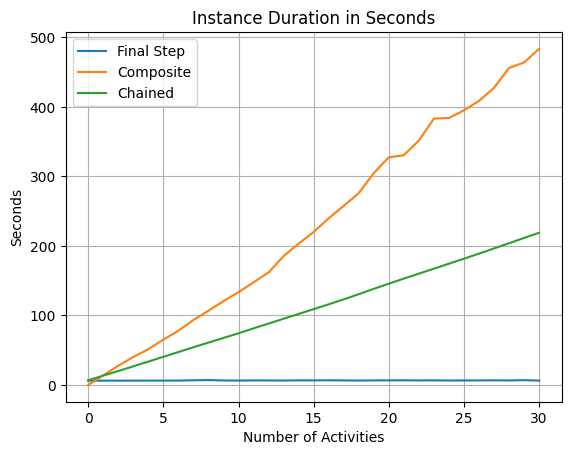

In [106]:
df_seconds = pd.concat([final_step_df, chained_df, unchained_df], axis=1)[["final_step_seconds","composite_seconds","chained_seconds"]]
df_seconds.columns = ["Final Step", "Composite","Chained"]
df_seconds["Chained"] = df_seconds["Chained"].cumsum()
df_seconds.plot(kind='line', title="Instance Duration in Seconds", ylabel="Seconds", xlabel="Number of Activities", grid=True)

<Axes: title={'center': 'Proof Size'}>

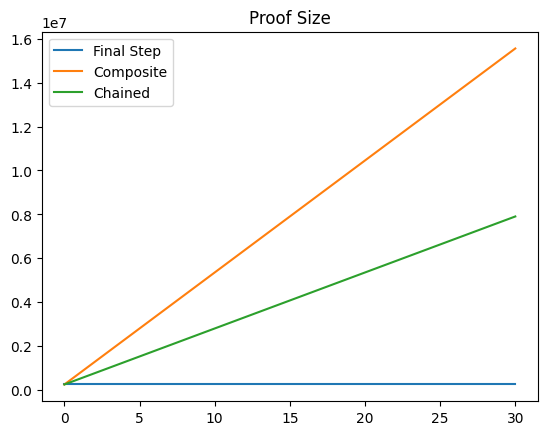

In [107]:
df_proof_size = pd.concat([final_step_df, chained_df, unchained_df], axis=1)[["final_step_proof_size","composite_proof_size","chained_proof_size"]]
df_proof_size.columns = ["Final Step", "Composite","Chained"]
df_proof_size.plot(kind='line', title="Proof Size")

In [174]:
df_seconds2 = df_seconds.copy()
df_seconds2["cap"] = activity_footprinting_unchained_df["seconds"]
df_seconds2["Chained"] = chained_df["chained_seconds"]
df_seconds2 = df_seconds2[["Final Step","cap","Composite","Chained"]]
df_seconds2 = df_seconds2[["Final Step","cap","Chained"]]
df_seconds2.rename(columns={"Final Step": "Final Step", "Composite": "Composite 2:\n Final\n Compositon", "Chained": "Chained", "cap":"Composite\n Activity Proving"}, inplace=True)


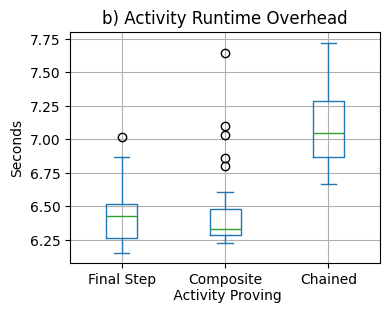

In [ ]:
df_seconds2.plot(kind='box', title="Activity Runtime Overhead", ylabel="Seconds", grid=True, logy=False, legend=False, figsize=(4,3))
plt.savefig("results/generated/boxplot_activity_runtime_overhead.pdf", bbox_inches='tight')

/var/folders/dd/kh1vblns6b346tg1k_ws08vw0000gn/T/ipykernel_31070/4012306197.py:14: MatplotlibDeprecationWarning: You have mixed positional and keyword arguments, some input may be discarded.  This is deprecated since 3.9 and will become an error in 3.11.
  fig.legend([ax[0], ax[1]],labels=labels,loc="lower center", ncol=3)
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


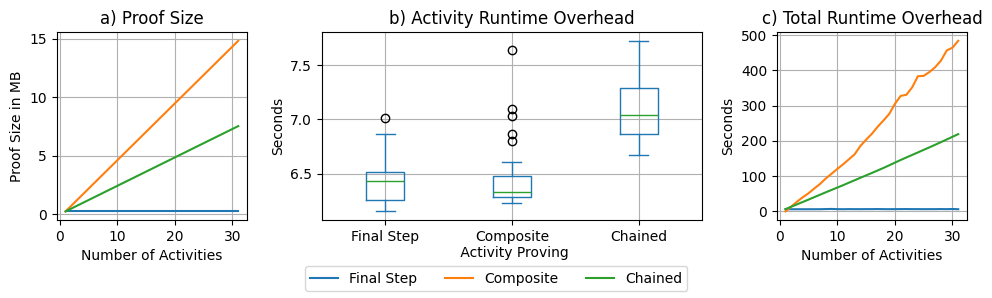

In [176]:
# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(10, 3),gridspec_kw={'width_ratios': [1, 2, 1]})  # 1 row, 2 columns

# Plot on first subplot
# Plot on second subplot
df_proof_size.index = range(1, len(df_proof_size) + 1)
df_seconds.index = range(1, len(df_seconds) + 1)
(df_proof_size/1024/1024).plot(kind='line', ax=ax[0], title="a) Proof Size", ylabel="Proof Size in MB", xlabel="Number of Activities", grid=True, logy=False, legend=False)
df_seconds.plot(kind='line', ax=ax[2], title="c) Total Runtime Overhead", ylabel="Seconds", xlabel="Number of Activities", grid=True, logy=False, legend=False)
df_seconds2.plot(kind='box', ax=ax[1], title="b) Activity Runtime Overhead", ylabel="Seconds", grid=True, logy=False, legend=False)
labels = ["Final Step", "Composite","Chained"]
plt.tight_layout()  # Adjust layout for better spacing
plt.subplots_adjust(bottom=0.25) 
fig.legend([ax[0], ax[1]],labels=labels,loc="lower center", ncol=3) 
#plt.show()
plt.savefig("generated.eps", format='eps', dpi=300)  # Save as EPS with high quality

In [140]:
df_seconds2.columns

Index(['Final Step', 'Final Composition\n Step', 'Chained',
       'Composite Activity \n Proving'],
      dtype='object')

<Axes: title={'center': 'Verification Speed in Seconds'}>

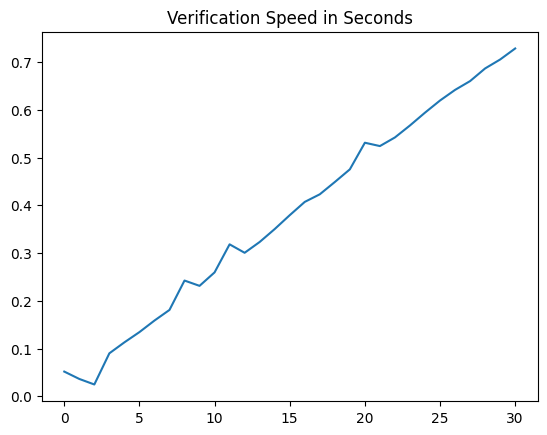

In [ ]:
df_unchained_verification_speed = unchained_df["composite_verification_seconds"]
df_unchained_verification_speed.plot(kind='line', title="Verification Speed in Seconds")

In [184]:
pd.concat([df_seconds.round(2),(df_proof_size/1024/1024).round(2).rename_axis("Proof Size in MB")],axis=1).to_csv("results/generated/summary.csv")